In [95]:
from SyntheticDataset import SyntheticDataset
from utils import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import r2_score

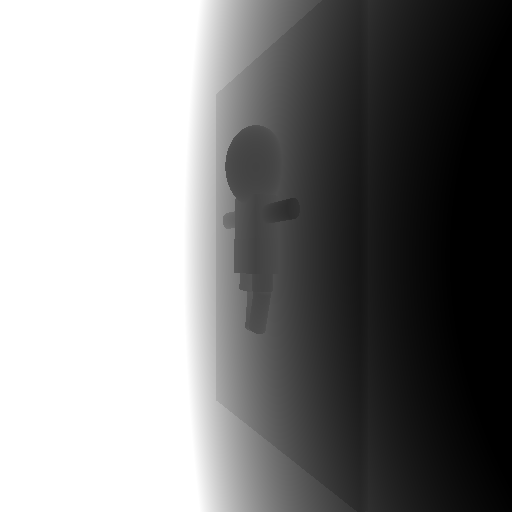

In [70]:
data_dir = "E:\db_synthetic_1"
dataset = SyntheticDataset(data_dir, transform=None)
dataset[0][0]

In [71]:
result_path_list = get_subdirpath_list()
result_path_list

['results\\0f3d825a59aa623836133f6ddd741054',
 'results\\ae78c14496c8bd3762a581e00808891d',
 'results\\c81aef8478b9f83bb99a1d3fcd26b6ac']

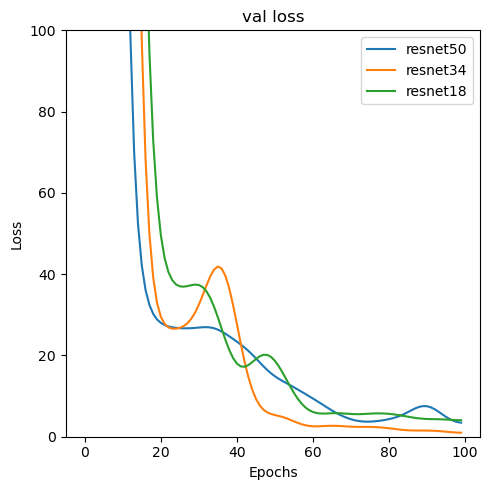

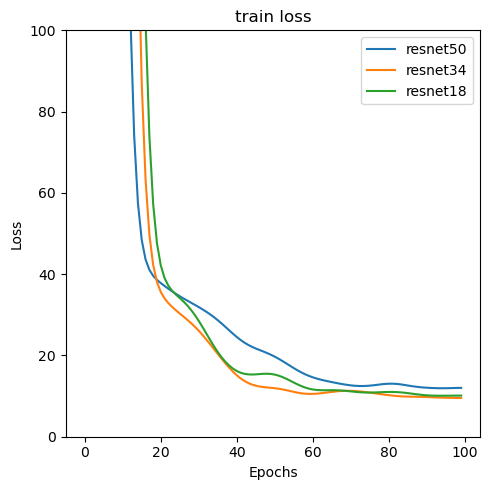

In [75]:
def log_vis(*arg, ylim=[0, 100], val=False, epochs=100, gaussian_smooth=True, sigma=4):
    plt.figure(figsize=(5,5))
    if val:
        key_word = 'val'
    else:
        key_word = 'train'
    for path_ in arg:
        cur_info_path = os.path.join(path_, 'info.json')
        cur_log_path = os.path.join(path_, 'loss_log.json')
        log_curve = json2dict(cur_log_path)[f'{key_word}_loss'][0:epochs]
        log_label = json2dict(cur_info_path)['model_name']

        # Apply Gaussian smoothing
        if gaussian_smooth: 
            log_curve = gaussian_filter1d(log_curve, sigma=sigma)
        plt.plot(log_curve, label=log_label) 

    plt.title(f'{key_word} loss')
    plt.ylim(ylim)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.legend()

log_vis(*result_path_list, val=True)
log_vis(*result_path_list, val=False)

R^2 Score: 0.931
Accuracy within ±1 unit: 0.406
Loss: 1.967


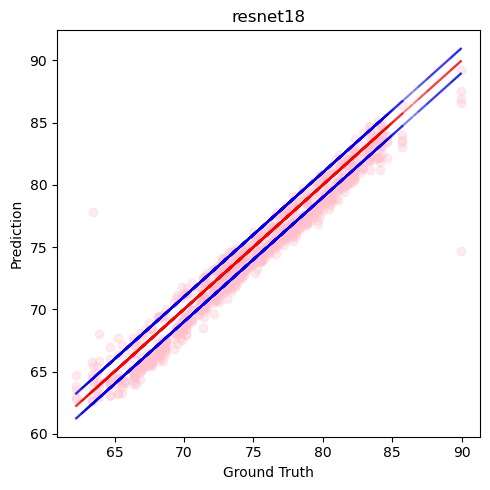

In [99]:
def pred_vis(session_path):
    pred_info_path = os.path.join(session_path, 'pred.json')
    model_info_path = os.path.join(session_path, 'info.json')
    test_log_path = os.path.join(session_path, 'test_log.json')

    pred_info = json2dict(pred_info_path)
    model_info = json2dict(model_info_path)
    test_log =  json2dict(test_log_path)
    model_name = model_info['model_name']
    test_loss = test_log['test_loss'][0] 

    gt = np.array(pred_info['true_labels']).reshape(1, -1)
    pred = np.array(pred_info['predictions']).reshape(1, -1)

    r_squared = r2_score(gt.reshape(-1, 1), pred.reshape(-1, 1))
    accuracy = np.mean(np.abs(gt - pred) <= 1)
    print(f'R^2 Score: {r_squared:.3f}')
    print(f'Accuracy within ±1 unit: {accuracy:.3f}')
    print(f'Loss: {test_loss:.3f}')

    # Plot
    plt.figure(figsize=(5,5))
    plt.scatter(gt, pred, c='pink', alpha=0.3)
    plt.title(f'{model_name}')

    # Create a line space for the ideal line where ground truth equals predictions
    line_space = np.linspace(min(np.minimum(gt, pred)), max(np.maximum(gt, pred)), 30)
    plt.plot(line_space, line_space, 'r', alpha=0.3, label='Ideal: y = x')  # Red dashed line
    plt.plot(line_space, line_space + 1, 'b', alpha=0.3, label='Error Margin +1')  # Blue dashed line for +1 error margin
    plt.plot(line_space, line_space - 1, 'b', alpha=0.3, label='Error Margin -1')  # Blue dashed line for -1 error margin

    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.tight_layout()
    plt.show()
    
pred_vis('results\c81aef8478b9f83bb99a1d3fcd26b6ac')